# 2.4. 微分
## 2.4.1. 导数和微分

In [1]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

In [2]:
# 定义 f(x) 函数 , 使用显示定义
def f(x):
    return 3 * x ** 2 - 4 * x

# 定义导数方法，
def numerical_lim(f,x,h):
    return ( f(x + h) - f(x) ) / h

# 执行导数
# 当 h 无限接近于 0  的时候， numerical_lim【函数的导数】 无限接近于 2
h = 0.1
for i in range(10):
    print(f'h={h:.10f},numerical limit={numerical_lim(f,1,h):.10f}')
    h = h / 10

h=0.1000000000,numerical limit=2.3000000000
h=0.0100000000,numerical limit=2.0300000000
h=0.0010000000,numerical limit=2.0030000000
h=0.0001000000,numerical limit=2.0003000000
h=0.0000100000,numerical limit=2.0000300000
h=0.0000010000,numerical limit=2.0000030001
h=0.0000001000,numerical limit=2.0000002987
h=0.0000000100,numerical limit=1.9999999878
h=0.0000000010,numerical limit=2.0000001655
h=0.0000000001,numerical limit=2.0000001655


## 2.4.1.1 定义jupyter 绘图函数，

In [3]:
#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中
# 因此，以后无需重新定义就可以直接调用它们（例如，d2l.use_svg_display()）

# use_svg_display 函数指定 matplotlib 软件包输出svg图表以获得更清晰的图像

#@save
def use_svg_display():
    """ 使用 svg 格式在 Jupyter 中 显示绘图 """
    display.set_matplotlib_formats('svg')

# 定义 set_figsize 函数来设置图表大小

#@save
def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小。"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# 定义 plot 函数来简洁地绘制多条曲线

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


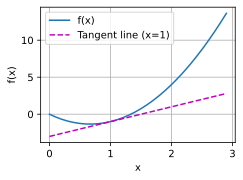

In [4]:
# 绘制函数  u=f(x) 及其在 x=1 处的切线 y=2x−3 ，其中系数 2 是切线的斜率。
x = np.arange(0 , 3 , 0.1)
plot(X = x,
     Y = [f(x) , 2 * x - 3],
     xlabel = 'x',
     ylabel = 'f(x)',
     legend = ['f(x)','Tangent line (x=1)']
     )

## 2.4.2. 偏导数

## 2.4.3. 梯度

## 2.4.4. 链式法则

<ipython-input-5-89a663ddd0d1>:2: RuntimeWarning: divide by zero encountered in true_divide
  Y = [x**3-1/x, 4*x-4],


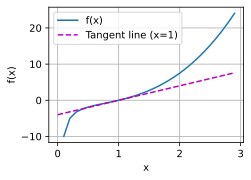

In [5]:
plot(X = x,
     Y = [x**3-1/x, 4*x-4],
     xlabel = 'x',
     ylabel = 'f(x)',
     legend = ['f(x)', 'Tangent line (x=1)'])